In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/test.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

muted_cm = ListedColormap(sns.color_palette("muted", 10).as_hex())

# Data overview

In [3]:
train = pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')
test.drop(columns='id', inplace=True)
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = train['label']
print(train.shape, y.shape)
train.describe()

(60000, 785) (60000,)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.008817,0.029467,0.037767,0.075933,...,0.015583,0.016450,0.013417,0.022300,0.012217,0.001383,0.003783,0.0,0.002717,0.0
std,2.872305,0.0,0.0,0.0,0.0,0.0,1.474271,2.700491,2.726371,3.993023,...,1.443852,1.958914,1.342572,2.051846,1.730959,0.338846,0.926724,0.0,0.665445,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,157.000000,255.000000,255.000000,83.000000,227.000000,0.0,163.000000,0.0


# Exploration & Visualization

### Randomly select some of the images and display

<Figure size 432x288 with 0 Axes>

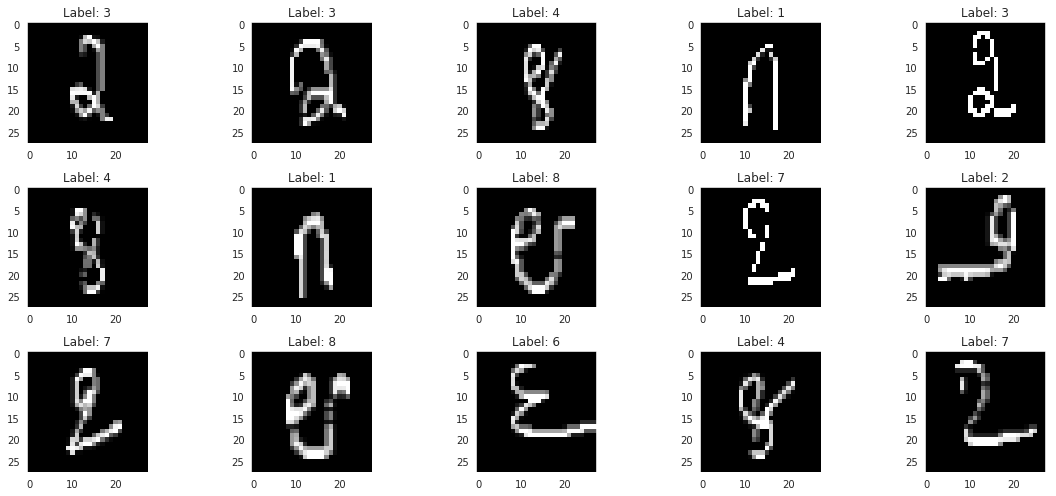

In [6]:
rand_ord = np.random.permutation(train.shape[0])

plt.gray()
fig = plt.figure(figsize=(16, 7))

for i in range(0, 15):
    img = train.loc[rand_ord[i], train.columns.to_list()[1:]].values.reshape((28,28))
    ax = plt.subplot(3, 5, i+1)
    ax.set_title('Label: ' + str(train.loc[rand_ord[i], 'label']))
    ax.imshow(img)
    ax.grid(False) 

plt.tight_layout()
plt.show()

In [7]:
cols = train.columns.to_list()[1:]
train_copy = train.copy()

## PyTorch

In [8]:
import torch
from torch import nn, optim
from torch.nn import functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
from torch.autograd import Variable
from torch.optim import lr_scheduler
from torchvision import models, transforms
from torchvision.utils import make_grid

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Dataset Creation

In [9]:
# Convert Df to Numpy
train.drop(columns='label', inplace=True)
train_np = train.values.reshape((-1,1,28,28)).astype(np.uint8)
y_np = y.values
test_np = test.values.reshape((-1,1,28,28)).astype(np.uint8)

# Split the training data
train_x, val_x, train_y, val_y = train_test_split(train_np, y_np, train_size=0.8)

# Numpy to Tensor
train_x_t = torch.from_numpy(train_x).type(torch.FloatTensor)
val_x_t = torch.from_numpy(val_x).type(torch.FloatTensor)
train_y_t = torch.from_numpy(train_y)
val_y_t = torch.from_numpy(val_y)
test_t = torch.from_numpy(test_np).type(torch.FloatTensor)

print(train_x_t.shape, val_x_t.shape, train_y_t.shape, val_y_t.shape, test_t.shape)

torch.Size([48000, 1, 28, 28]) torch.Size([12000, 1, 28, 28]) torch.Size([48000]) torch.Size([12000]) torch.Size([5000, 1, 28, 28])


## Dataloader

In [10]:
# Create Tensor Dataset
train_dataset = TensorDataset(train_x_t, train_y_t)
val_dataset = TensorDataset(val_x_t, val_y_t)

batch_sz = 64

# train dataloader
train_loader = DataLoader(train_dataset, batch_size=batch_sz, shuffle=True, num_workers=4)
# Validation dataloader
val_loader = DataLoader(val_dataset, batch_size=batch_sz, shuffle=True, num_workers=4)

### Check Batch Shape

In [11]:
def check_shape(ds_loader):
    examples = enumerate(ds_loader)
    # b_id, (example_data, example_targets) = next(examples)
    b_id, example_data = next(examples)
    return b_id, example_data[0].size()

print('[Train] batch Shape: ', check_shape(train_loader))
print('[Val]   batch Shape: ', check_shape(val_loader))

[Train] batch Shape:  (0, torch.Size([64, 1, 28, 28]))
[Val]   batch Shape:  (0, torch.Size([64, 1, 28, 28]))


### Sample Display of a batch

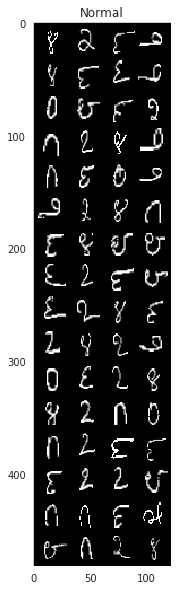

In [12]:
def imshow(img, title=''):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(np.transpose( img.numpy(), (1, 2, 0)).astype(np.uint8), cmap='gray')
    plt.grid(False)
    plt.show()

for i, data in enumerate(train_loader):
    x, y = data  
    imshow(make_grid(x, 4), title='Normal')
    break

## Model

In [13]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )
        
        self.fc = nn.Sequential(
            nn.Linear(128, 10)
        )
                
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = F.log_softmax(x, dim=1)
        return x
    
model = Model()
model = model.to(device)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

print(model)

Model(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Dropout(p=0.25, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5):

### Training and Validation

In [14]:
import time
import copy

epochs = 100
stopped_at_epoch = None
train_losses, val_losses = [], []
train_accu, val_accu = [], []
start_time = time.time()
early_stop_counter = 10   # stop when the validation loss does not improve for 10 iterations to prevent overfitting
counter = 0
best_val_loss = float('Inf')

for e in range(epochs):
    epoch_start_time = time.time()
    running_loss = 0
    accuracy=0
    # training step
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        log_ps = model(images)
        
        ps = torch.exp(log_ps)                
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_losses.append(running_loss/len(train_loader))
    train_accu.append(accuracy/len(train_loader))
    val_loss = 0
    accuracy=0
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            log_ps = model(images)
            val_loss += criterion(log_ps, labels)

            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
    val_losses.append(val_loss/len(val_loader))
    val_accu.append(accuracy/len(val_loader))

    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Time: {:.2f}s..".format(time.time()-epoch_start_time),
          "Training Loss: {:.3f}.. ".format(train_losses[-1]),
          "Training Accu: {:.3f}.. ".format(train_accu[-1]),
          "Val Loss: {:.3f}.. ".format(val_losses[-1]),
          "Val Accu: {:.3f}".format(val_accu[-1]))

    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        counter=0
        best_model_wts = copy.deepcopy(model.state_dict())
    else:
        counter+=1
        print('Validation loss has not improved since: {:.3f}..'.format(best_val_loss), 'Count: ', str(counter))
        if counter >= early_stop_counter:
            stopped_at_epoch = e
            print('Early Stopping Now!!!!')
            model.load_state_dict(best_model_wts)
            break

Epoch: 1/100..  Time: 8.58s.. Training Loss: 0.611..  Training Accu: 0.812..  Val Loss: 0.082..  Val Accu: 0.975
Epoch: 2/100..  Time: 8.00s.. Training Loss: 0.110..  Training Accu: 0.969..  Val Loss: 0.043..  Val Accu: 0.987
Epoch: 3/100..  Time: 8.88s.. Training Loss: 0.066..  Training Accu: 0.982..  Val Loss: 0.030..  Val Accu: 0.990
Epoch: 4/100..  Time: 8.25s.. Training Loss: 0.046..  Training Accu: 0.987..  Val Loss: 0.024..  Val Accu: 0.993
Epoch: 5/100..  Time: 8.53s.. Training Loss: 0.038..  Training Accu: 0.990..  Val Loss: 0.020..  Val Accu: 0.993
Epoch: 6/100..  Time: 8.31s.. Training Loss: 0.029..  Training Accu: 0.992..  Val Loss: 0.019..  Val Accu: 0.994
Epoch: 7/100..  Time: 8.55s.. Training Loss: 0.026..  Training Accu: 0.993..  Val Loss: 0.017..  Val Accu: 0.995
Epoch: 8/100..  Time: 8.34s.. Training Loss: 0.023..  Training Accu: 0.993..  Val Loss: 0.020..  Val Accu: 0.994
Validation loss has not improved since: 0.017.. Count:  1
Epoch: 9/100..  Time: 8.70s.. Training

### Plot Accuracy & Loss Graph

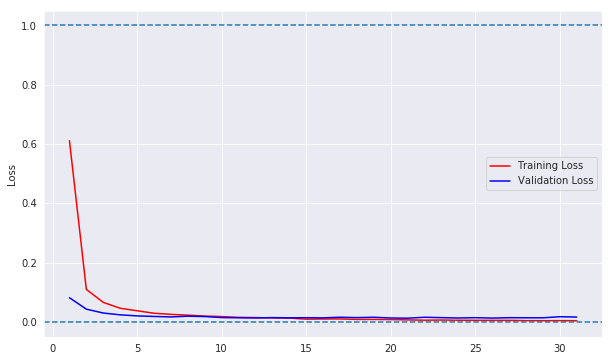

In [15]:
# Training Loss & Validation Loss
plt.figure(figsize=(10,6))

plt.ylabel('Loss')
plt.plot(range(1, stopped_at_epoch + 2), train_losses[:stopped_at_epoch+1], 'r', label='Training Loss')
plt.plot(range(1, stopped_at_epoch + 2), val_losses[:stopped_at_epoch+1], 'b', label='Validation Loss')
plt.axhline(y=0, linestyle='--')
plt.axhline(y=1, linestyle='--')
plt.legend()

plt.show()

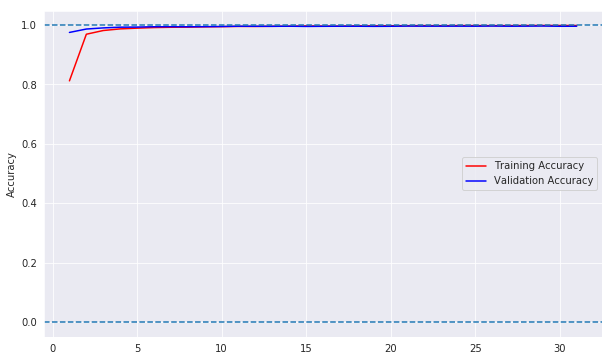

In [16]:
# Training Accuracy & Validation Accuracy
plt.figure(figsize=(10,6))

plt.ylabel('Accuracy')
plt.plot(range(1, stopped_at_epoch + 2), train_accu[:stopped_at_epoch+1], 'r', label='Training Accuracy')
plt.plot(range(1, stopped_at_epoch + 2), val_accu[:stopped_at_epoch+1], 'b', label='Validation Accuracy')
ax.grid(linestyle='-')
plt.axhline(y=0, linestyle='--')
plt.axhline(y=1, linestyle='--')
plt.legend()

plt.show()

### Prediction

In [17]:
model.eval()
with torch.no_grad():
    ps = model(test_t.to(device))
    prediction = torch.argmax(ps, 1)
    
prediction = prediction.cpu().tolist()
len(prediction)

5000

### CSV generation

In [18]:
sub_dict = {'id': np.arange(len(prediction)),
            'label': prediction}
sub_df = pd.DataFrame(data=sub_dict)
sub_df.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


In [19]:
sub_df.to_csv('submission.csv', index=False)